### RELAX DATA SCIENCE CHALLENGE
***
##### PROMPT:
The data is available as two attached CSV files: 
- takehome_user_engagement.csv 
- takehome_users.csv<br>

The data has the following two tables: 
- 1 A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years.  This table includes:  
    - name: the user's name 
    - object_id: the user's id 
    - email: email address  
    - creation_source: how their account was created. This takes on one of 5 values: 
        - PERSONAL_PROJECTS: invited to join another user's personal workspace 
        - GUEST_INVITE: invited to an organization as a guest (limited permissions) 
        - ORG_INVITE: invited to an organization (as a full member) 
        - SIGNUP: signed up via the website 
        - SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id) 
    - creation_time: when they created their account 
    - last_session_creation_time: unix timestamp of last login 
    - opted_in_to_mailing_list: whether they have opted into receiving marketing emails 
    - enabled_for_marketing_drip: whether they are on the regular marketing email drip 
    - org_id: the organization (group of users) they belong to 
    - invited_by_user_id: which user invited them to join (if applicable). 
- 2 A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.   
 
Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption. 
We suggest spending 1 - ­2 hours on this, but you're welcome to spend more or less.  Please send us a brief writeup of your findings (the more   concise, the better no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach.  Please note any factors you considered or investigation you did, even if they did not pan out.  Feel free to identify any further research or data you think would be valuable.
***

In [293]:
### IMPORT MODULES ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### IMPORT DATA ###
user_engagement_df = pd.read_csv('takehome_user_engagement.csv', encoding='us-ascii')
users_df = pd.read_csv('takehome_users.csv', encoding='iso-8859-1')

In [294]:
user_engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [295]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [296]:
user_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [297]:
user_engagement_df.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [298]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [299]:
users_df.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [300]:
print(f'Num of Unique Values in \'invited_by_user_id\': {len(users_df.invited_by_user_id.unique())}')
print(f'Total Num of Invites in \'invited_by_user_id\': {len(users_df[users_df.invited_by_user_id.isna() == False])}')

Num of Unique Values in 'invited_by_user_id': 2565
Total Num of Invites in 'invited_by_user_id': 6417


Since this approx equals a little more than 2 invites per unique user_id Which doesnt make it worth it to convert this column into a categorical column with all unique values rather, I'm going to convert it to a column of whether or not a user was referred or not, represented by a 1 or a 0.

In [301]:
for i in users_df[users_df['invited_by_user_id'].isna() == False].index:
    users_df.loc[i, 'invited'] = 1
for i in users_df[users_df['invited_by_user_id'].isna() == True].index:
    users_df.loc[i, 'invited'] = 0
users_df.drop(columns='invited_by_user_id', inplace=True)

Now we need to address the NaN values in last_session_creation_time column

In [302]:
# first cast columns with dates to datetime objects
users_df['creation_time'] = pd.to_datetime(users_df['creation_time'])
users_df['last_session_creation_time'] = pd.to_datetime(users_df['last_session_creation_time'], unit='s')

In [303]:
# convert the remaining NaT values into dates by filling with creation_date values at the same index under the assumption that the last time they logged in was when they created their accounts.
for i in range(len(users_df)):
    if users_df.loc[i, 'last_session_creation_time'] is pd.NaT:
        users_df.loc[i, 'last_session_creation_time'] = users_df.loc[i, 'creation_time']

Excellent! now we need to begin accounting for the number of logins.

In [305]:
users_df = users_df.merge(user_engagement_df, 
               how='inner',
               left_on='object_id',
               right_on='user_id')

In [306]:
users_df.drop(columns=['object_id', 'visited'], inplace=True)
users_df.rename(columns={'time_stamp': 'logins'}, inplace=True)
users_df['logins'] = pd.to_datetime(users_df['logins'])
users_df.sort_values(['name','logins'], ascending=True, inplace=True)
users_df = users_df.reset_index().drop(columns='index')

In [307]:
users_df.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited,logins,user_id
0,2013-11-02 02:32:43,Aachen Frank,FrankAachen@cuvox.de,SIGNUP,2013-11-04 02:32:43,1,1,11,0.0,2013-11-04 02:32:43,2905
1,2013-12-02 16:06:17,Aachen Klaus,KlausAachen@gustr.com,GUEST_INVITE,2013-12-03 16:06:17,0,0,156,1.0,2013-12-03 16:06:17,11045
2,2014-05-19 10:30:49,Aachen Petra,PetraAachen@gmail.com,SIGNUP_GOOGLE_AUTH,2014-05-23 10:30:49,1,0,17,0.0,2014-05-23 10:30:49,161
3,2013-07-14 04:16:26,Aaron Jai,JaiAaron@yahoo.com,SIGNUP,2013-07-14 04:16:26,0,0,341,0.0,2013-07-14 04:16:26,3893
4,2012-10-24 14:41:16,Abbott Anna,AnnaAbbott@yahoo.com,SIGNUP,2012-11-13 14:41:16,1,0,65,0.0,2012-10-24 14:41:16,793


In [308]:
adopted = []
users = users_df['name'].unique()
for user in users:
    temp_df = pd.DataFrame(users_df[users_df['name'] == user])
    temp_df = temp_df.resample(rule='W', on='logins').agg({'logins':'count'})
    temp_df.rename(columns={'logins':'login counts'}, inplace=True)
    if np.any(temp_df['login counts'] >= 3):
        adopted.append(1)
    else:
        adopted.append(0)            
del temp_df

In [309]:
merge_dict = {users[i]: adopted[i] for i in range(len(users))}
merge_df = pd.DataFrame(list(merge_dict.items()), columns=['names', 'adopted'])

In [310]:
users_df = users_df.merge(merge_df, how='inner', left_on='name', right_on='names')

In [311]:
users_df.drop(columns='names', inplace=True)

In [312]:
users_df.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited,logins,user_id,adopted
0,2013-11-02 02:32:43,Aachen Frank,FrankAachen@cuvox.de,SIGNUP,2013-11-04 02:32:43,1,1,11,0.0,2013-11-04 02:32:43,2905,0
1,2013-12-02 16:06:17,Aachen Klaus,KlausAachen@gustr.com,GUEST_INVITE,2013-12-03 16:06:17,0,0,156,1.0,2013-12-03 16:06:17,11045,0
2,2014-05-19 10:30:49,Aachen Petra,PetraAachen@gmail.com,SIGNUP_GOOGLE_AUTH,2014-05-23 10:30:49,1,0,17,0.0,2014-05-23 10:30:49,161,0
3,2013-07-14 04:16:26,Aaron Jai,JaiAaron@yahoo.com,SIGNUP,2013-07-14 04:16:26,0,0,341,0.0,2013-07-14 04:16:26,3893,0
4,2012-10-24 14:41:16,Abbott Anna,AnnaAbbott@yahoo.com,SIGNUP,2012-11-13 14:41:16,1,0,65,0.0,2012-10-24 14:41:16,793,0


Now that is all cleaned let's actually analyze this.

<Axes: >

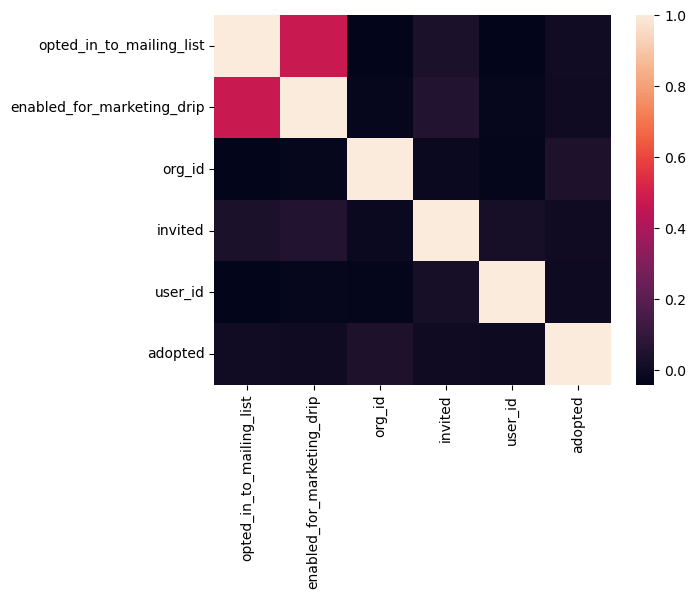

In [313]:
corr = users_df.corr(numeric_only=True)
sns.heatmap(corr)

<Axes: >

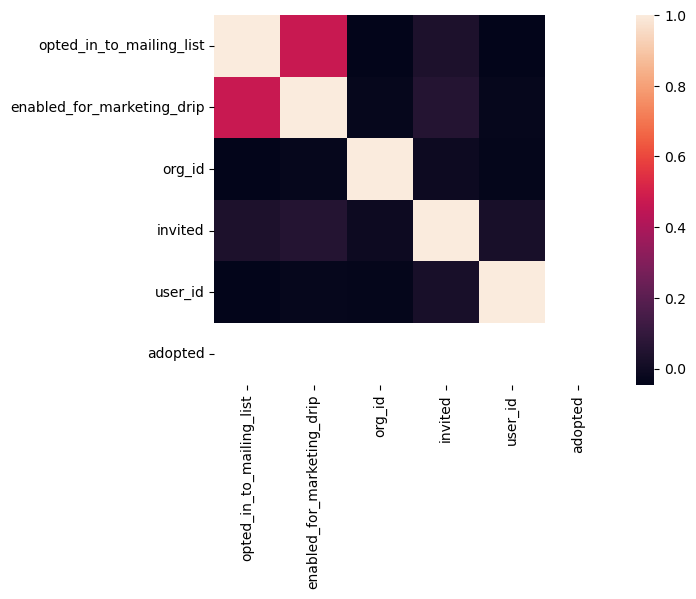

In [314]:
# Separate between adopted and non adopted values to see if there are different correlations to be found.
adopt_corr = users_df[users_df['adopted'] == 1].corr(numeric_only=True)
sns.heatmap(adopt_corr)

<Axes: >

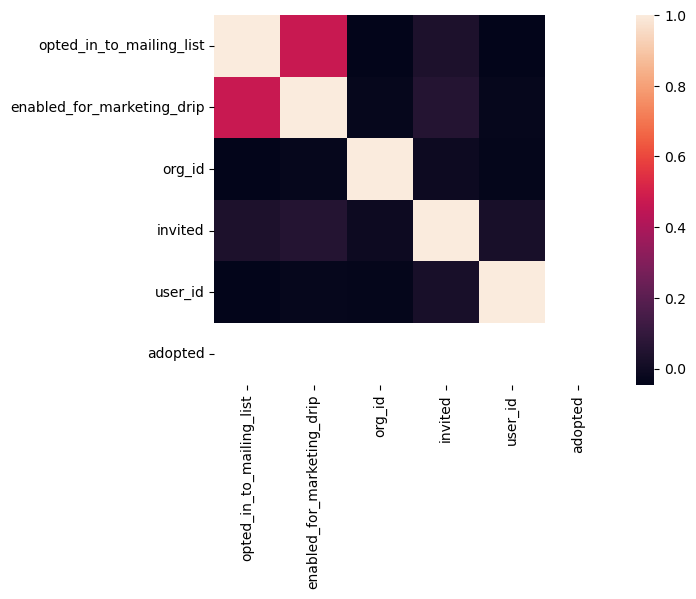

In [315]:
nonadopt_corr = users_df[users_df['adopted'] == 0].corr(numeric_only=True)
sns.heatmap(adopt_corr)

<Axes: xlabel='org_id', ylabel='user_id'>

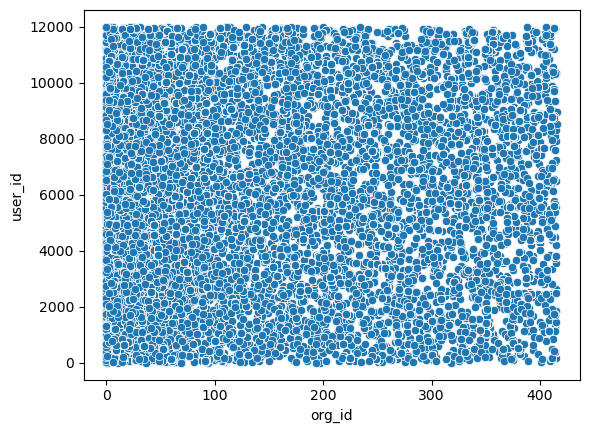

In [319]:
sns.scatterplot(x=users_df['org_id'], y=users_df['user_id'])